In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Set the working directory
cbis_path = '/content/drive/MyDrive/colab_scripts/repository/datasets'
os.chdir(cbis_path)

# Confirm current directory
print("Current Directory:", os.getcwd())

Current Directory: /content/drive/MyDrive/colab_scripts/repository/datasets


🔍 Row 0:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/1-250.jpg
YOLO BBox: (0.153935, 0.553141, 0.129299, 0.098794)


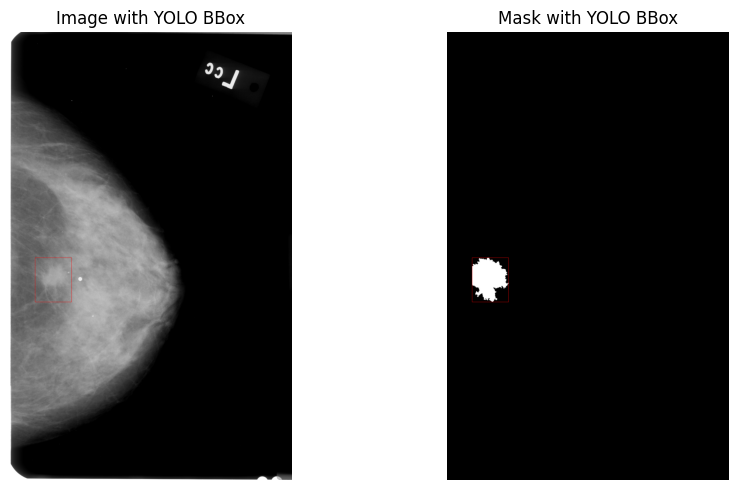

🔍 Row 1:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/1-207.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/2-288.jpg
YOLO BBox: (0.142696, 0.647083, 0.081325, 0.0525)


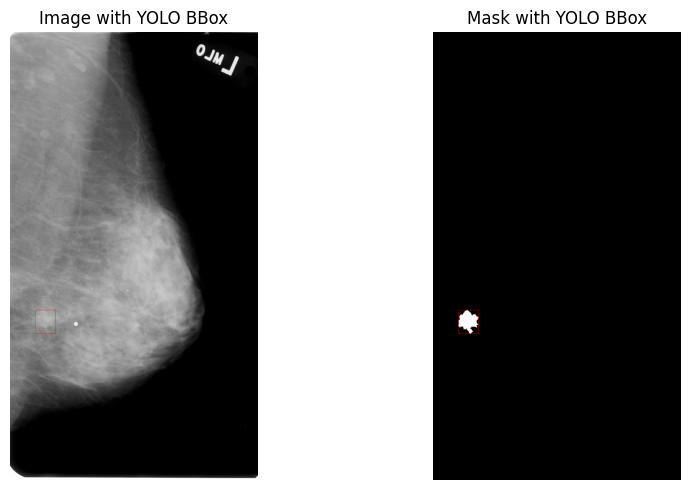

🔍 Row 2:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/1-250.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/1-296.jpg
YOLO BBox: (0.538681, 0.676197, 0.128265, 0.077581)


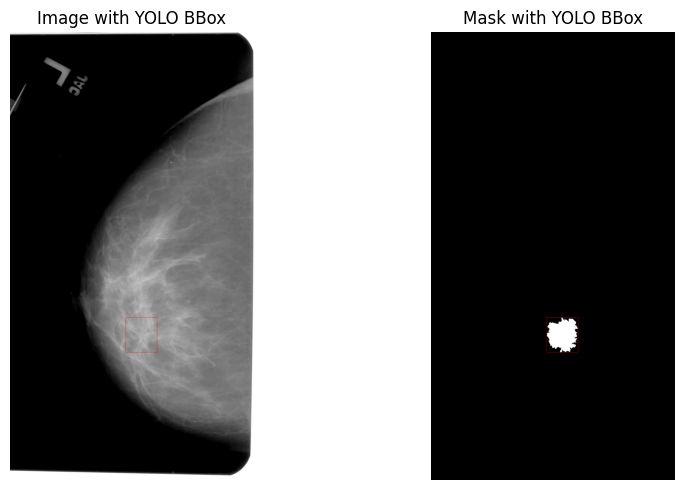

🔍 Row 3:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/1-245.jpg
YOLO BBox: (0.605384, 0.591604, 0.12541, 0.070479)


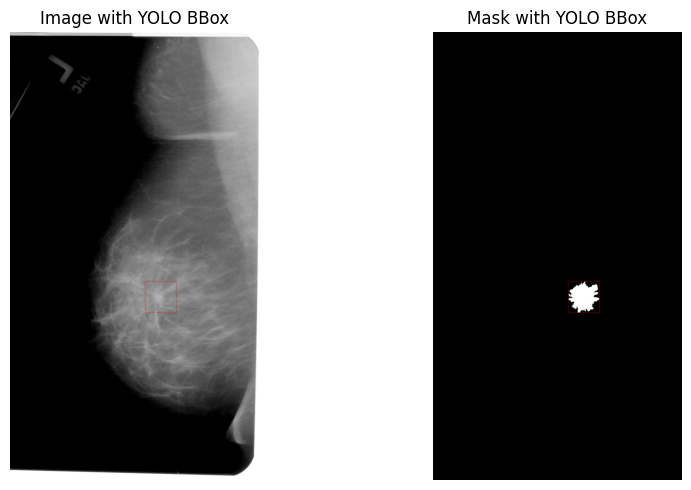

🔍 Row 4:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890/1-056.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/2-183.jpg
YOLO BBox: (0.311405, 0.72546, 0.145998, 0.06538)


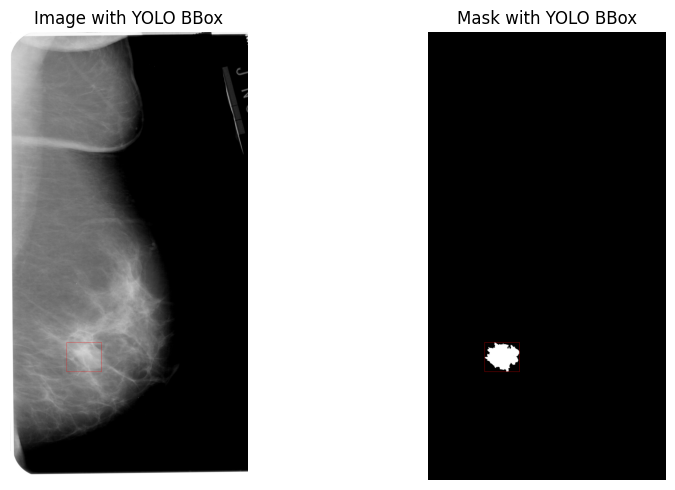

🔍 Row 5:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.392091931911637760938815694332198115839/1-275.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.38355348211600094806469224183939342192/1-001.jpg
YOLO BBox: (0.265186, 0.510358, 0.090662, 0.040757)


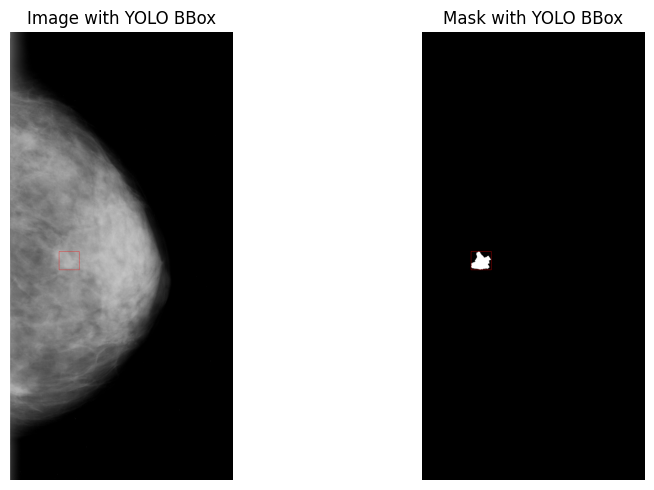

🔍 Row 6:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.18553022011298363903753970133853455201/1-104.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.401504763912518926442932683851439819951/1-106.jpg
YOLO BBox: (0.25963, 0.507881, 0.069337, 0.043866)


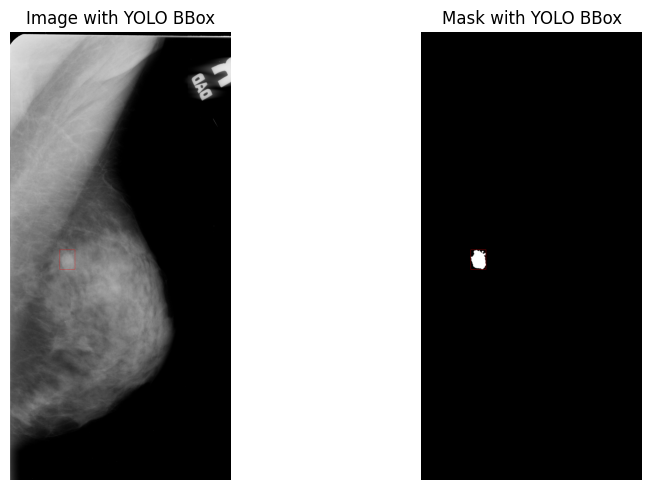

🔍 Row 7:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399831242111800621220027542190666363688/1-046.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.225307445711972492021703541080800178003/2-149.jpg
YOLO BBox: (0.18075, 0.439391, 0.061, 0.042327)


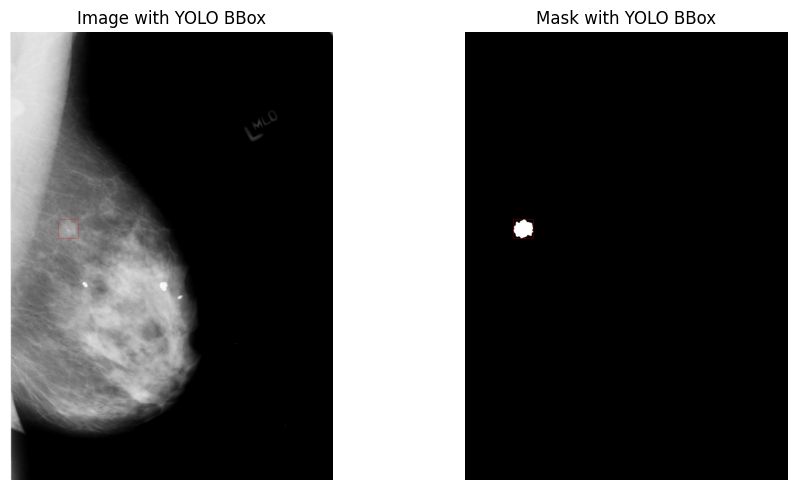

🔍 Row 8:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.353764633213863442442494539840710764601/1-092.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.393707185513959554524123170961270881067/1-187.jpg
YOLO BBox: (0.791796, 0.322246, 0.117647, 0.056356)


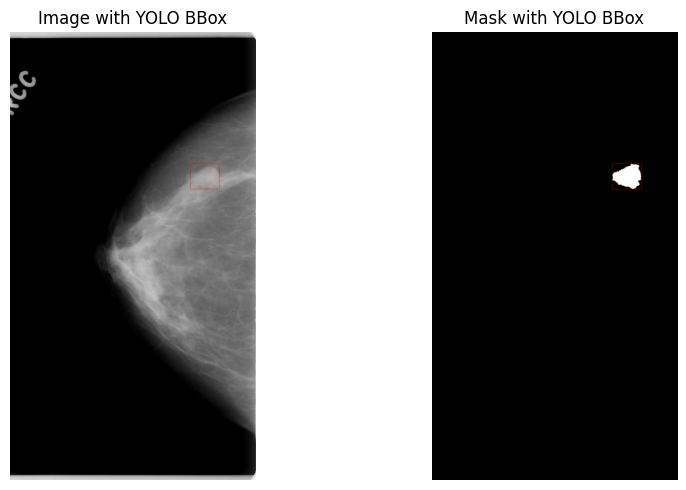

🔍 Row 9:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.301773695910378556700140939623830965391/1-082.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.47910753912017870434385834703698378596/1-238.jpg
YOLO BBox: (0.632075, 0.488636, 0.09827, 0.05446)


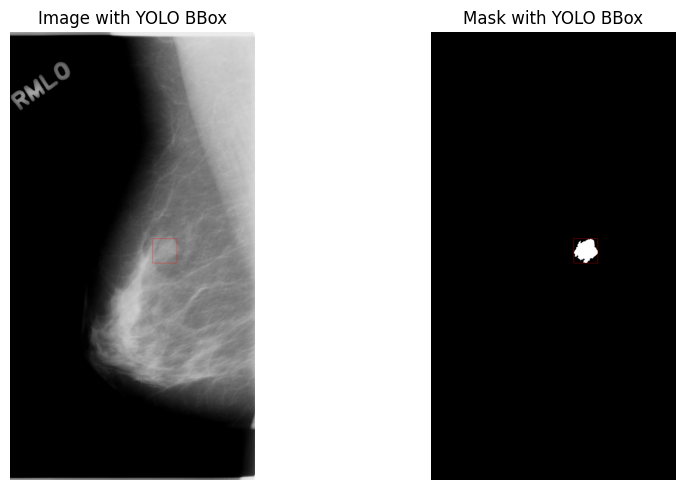

In [4]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from ast import literal_eval

# Load DataFrame
csv_path = 'CBIS-DDSM/csv/mass_train_jpg2_bbox.csv'
df = pd.read_csv(csv_path)

# Convert string bbox to tuple
df['yolo_bbox'] = df['yolo_bbox'].apply(literal_eval)

# Function to draw bbox on an image or mask
def draw_bbox(image_path, yolo_bbox):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    if image is None:
        print(f"⚠️ Could not read: {image_path}")
        return None

    # Convert grayscale to BGR if necessary
    if len(image.shape) == 2 or image.shape[2] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    h, w = image.shape[:2]
    x_c, y_c, bw, bh = yolo_bbox

    x_center = x_c * w
    y_center = y_c * h
    box_w = bw * w
    box_h = bh * h

    x1 = int(x_center - box_w / 2)
    y1 = int(y_center - box_h / 2)
    x2 = int(x_center + box_w / 2)
    y2 = int(y_center + box_h / 2)

    if x2 <= x1 or y2 <= y1:
        print("⚠️ Invalid bbox size — skipping.")
        return image

    # Draw red rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return image

# Iterate and show bbox on image and mask side by side
for idx, row in df.head(10).iterrows():
    img_path = row['jpg image file path']
    mask_path = row['jpg ROI mask file path']
    bbox = row['yolo_bbox']

    print(f"🔍 Row {idx}:")
    print(f"Image Path: {img_path}")
    print(f"Mask Path: {mask_path}")
    print(f"YOLO BBox: {bbox}")

    img_with_bbox = draw_bbox(img_path, bbox)
    mask_with_bbox = draw_bbox(mask_path, bbox)

    if img_with_bbox is None or mask_with_bbox is None:
        continue

    # Show side-by-side comparison
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Image with YOLO BBox")
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(mask_with_bbox, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Mask with YOLO BBox")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Optional: Pause or limit number of images
    # break  # Uncomment to stop after first image